# Rain and Price Combined

In [23]:
from get_cleaned_data import get_price_data_cleaned
import get_cleaned_data as cd

price_df = get_price_data_cleaned()

price_df.head()



,DateValueCET,TimeValueCET,PowerPriceAreaCode,PriceMWh,DateTime,day_of_year,hour,year
0,2024-09-12,0 days 04:00:00,BRAZIL_NORTH,286.29,2024-09-12 04:00:00,256,4,2024
1,2024-09-12,0 days 04:00:00,BRAZIL_NORTHEAST,286.24,2024-09-12 04:00:00,256,4,2024
2,2024-09-12,0 days 04:00:00,BRAZIL_SOUTH,286.28,2024-09-12 04:00:00,256,4,2024
3,2024-09-12,0 days 04:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,286.28,2024-09-12 04:00:00,256,4,2024
4,2024-09-12,0 days 03:00:00,BRAZIL_NORTH,304.05,2024-09-12 03:00:00,256,3,2024


In [24]:
import pandas as pd
from get_cleaned_data import get_rain_data_cleaned

df_rain = get_rain_data_cleaned()
df_rain.head()

c:\Users\veron\Desktop\9th semester\Bachelor1\Code\BachelorProject\EDA\get_cleaned_data.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
c:\Users\veron\Desktop\9th semester\Bachelor1\Code\BachelorProject\EDA\get_cleaned_data.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M

,DateValueUTC,TimeValueUTC,Region,Rain,Unit,DateTime,Month,TimeValueCET,day_of_week,hour_sin,hour_cos,day_of_year,day_sin,day_cos,is_weekend,year,PowerPriceAreaCode
0,2024-01-01,00,SE,0.0,mm,2024-01-01 00:00:00,1,2024-01-01 01:00:00+01:00,0,0.000000,1.000000,1,0.017213,0.999852,0,2024,BRAZIL_SOUTHEAST_CENTRALWEST
1,2024-01-01,01,SE,0.0,mm,2024-01-01 01:00:00,1,2024-01-01 02:00:00+01:00,0,0.258819,0.965926,1,0.017213,0.999852,0,2024,BRAZIL_SOUTHEAST_CENTRALWEST
2,2024-01-01,02,SE,0.0,mm,2024-01-01 02:00:00,1,2024-01-01 03:00:00+01:00,0,0.500000,0.866025,1,0.017213,0.999852,0,2024,BRAZIL_SOUTHEAST_CENTRALWEST
3,2024-01-01,03,SE,0.0,mm,2024-01-01 03:00:00,1,2024-01-01 04:00:00+01:00,0,0.707107,0.707107,1,0.017213,0.999852,0,2024,BRAZIL_SOUTHEAST_CENTRALWEST
4,2024-01-01,04,SE,0.0,mm,2024-01-01 04:00:00,1,2024-01-01 05:00:00+01:00,0,0.866025,0.500000,1,0.017213,0.999852,0,2024,BRAZIL_SOUTHEAST_CENTRALWEST


In [25]:
from get_cleaned_data import get_price_and_rain_df
import filtering_functions as ff
merged_df = get_price_and_rain_df(df_rain, price_df)
df_2024 = ff.get_values_for_specific_year(merged_df, 2024)
df_2022 = ff.get_values_for_specific_year(merged_df, 2022)
df_2023 = ff.get_values_for_specific_year(merged_df, 2023)

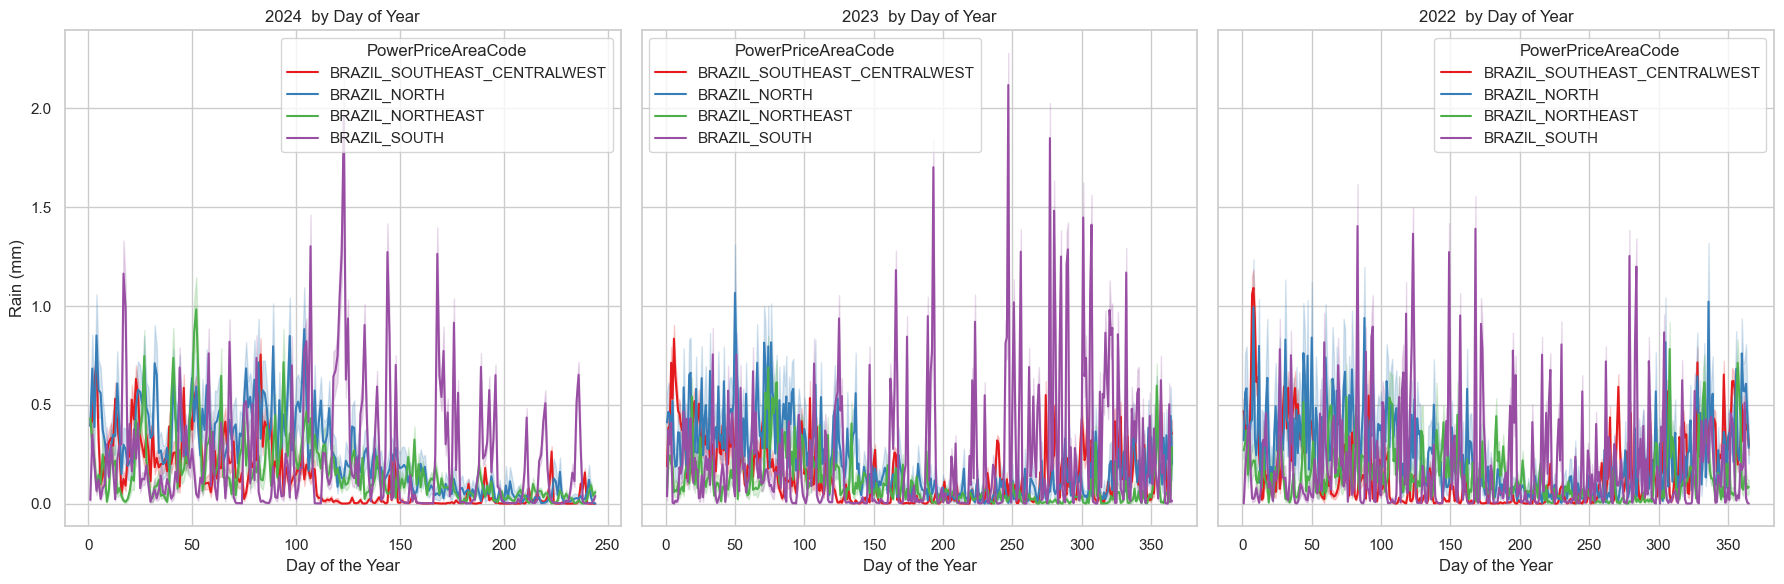

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_line_subplot(ax, df, year):
    # Create line plot with color differentiation for regions
    sns.lineplot(
        ax=ax,
        x='day_of_year_x', 
        y='Rain', 
        hue='PowerPriceAreaCode', 
        data=df,
        palette='Set1',  # Use distinct colors for regions
        legend=True      # Handle legend outside of the subplot
    )
    ax.set_title(f'{year}  by Day of Year')
    ax.set_xlabel('Day of the Year')
    ax.set_ylabel('Rain (mm)')
    return ax

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot line charts for each year
plot_line_subplot(axs[0], df_2024, 2024)
plot_line_subplot(axs[1], df_2023, 2023)
plot_line_subplot(axs[2], df_2022, 2022)

# Adjust layout for better spacing
plt.tight_layout()

# Add one common legend for all plots
handles, labels = axs[0].get_legend_handles_labels()  # Get the handles and labels from the first plot
#fig.legend(handles, labels, loc='upper right', title='PowerPriceAreaCode')

# Show the figure
plt.show()

In [27]:

merged_df = pd.merge(price_df, df_rain, on=['DateTime', 'PowerPriceAreaCode'], how='inner')
merged_df.head()
display(merged_df.columns)

Index(['DateValueCET', 'TimeValueCET_x', 'PowerPriceAreaCode', 'PriceMWh',
       'DateTime', 'day_of_year_x', 'hour', 'year_x', 'DateValueUTC',
       'TimeValueUTC', 'Region', 'Rain', 'Unit', 'Month', 'TimeValueCET_y',
       'day_of_week', 'hour_sin', 'hour_cos', 'day_of_year_y', 'day_sin',
       'day_cos', 'is_weekend', 'year_y'],
      dtype='object')

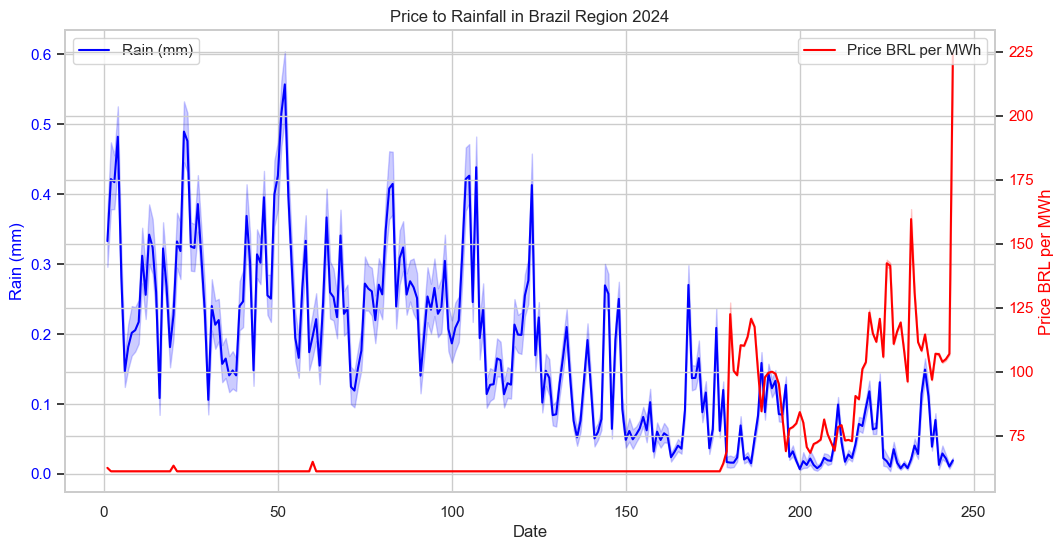

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_2024[['Rain', 'day_of_year_x']].dropna(), x='day_of_year_x', y='Rain', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Rain (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_2024[['PriceMWh', 'day_of_year_x']].dropna(), x='day_of_year_x', y='PriceMWh', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to Rainfall in Brazil Region 2024')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


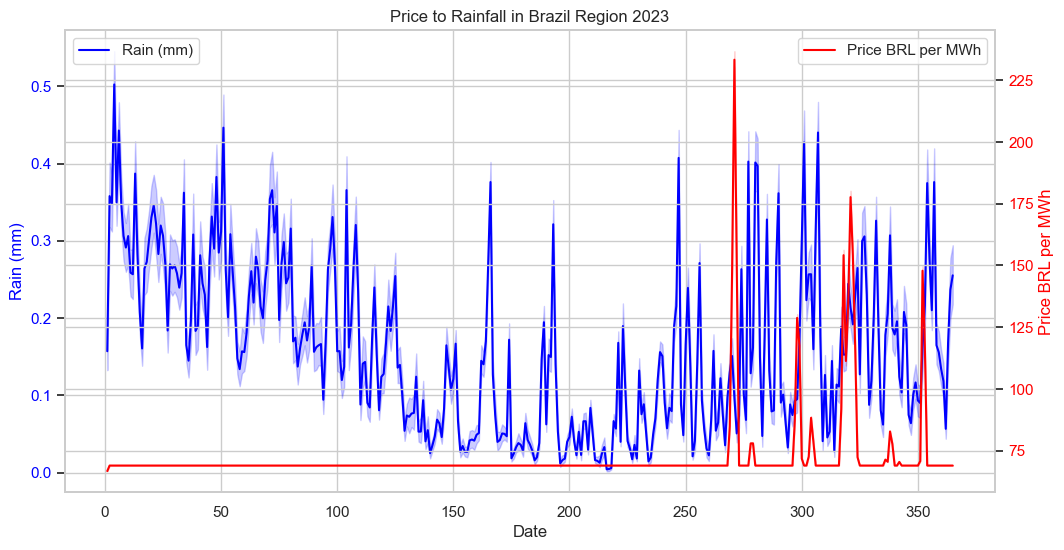

In [29]:


# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_2023[['Rain', 'day_of_year_x']].dropna(), x='day_of_year_x', y='Rain', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Rain (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_2023[['PriceMWh', 'day_of_year_x']].dropna(), x='day_of_year_x', y='PriceMWh', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to Rainfall in Brazil Region 2023')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

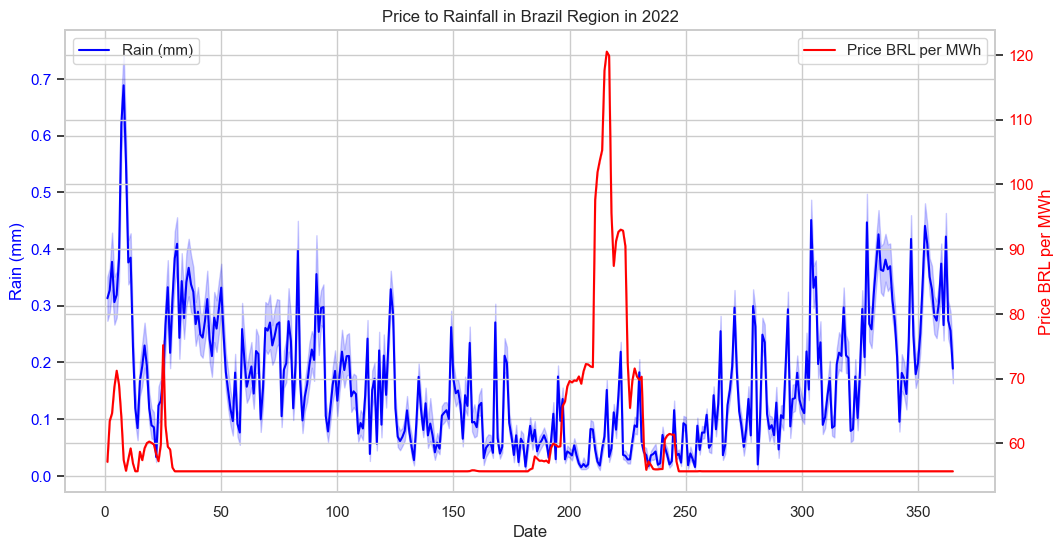

In [30]:


# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_2022[['Rain', 'day_of_year_x']].dropna(), x='day_of_year_x', y='Rain', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Rain (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_2022[['PriceMWh', 'day_of_year_x']].dropna(), x='day_of_year_x', y='PriceMWh', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to Rainfall in Brazil Region in 2022')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

ValueError: Could not interpret value `Price` for `y`. An entry with this name does not appear in `data`.

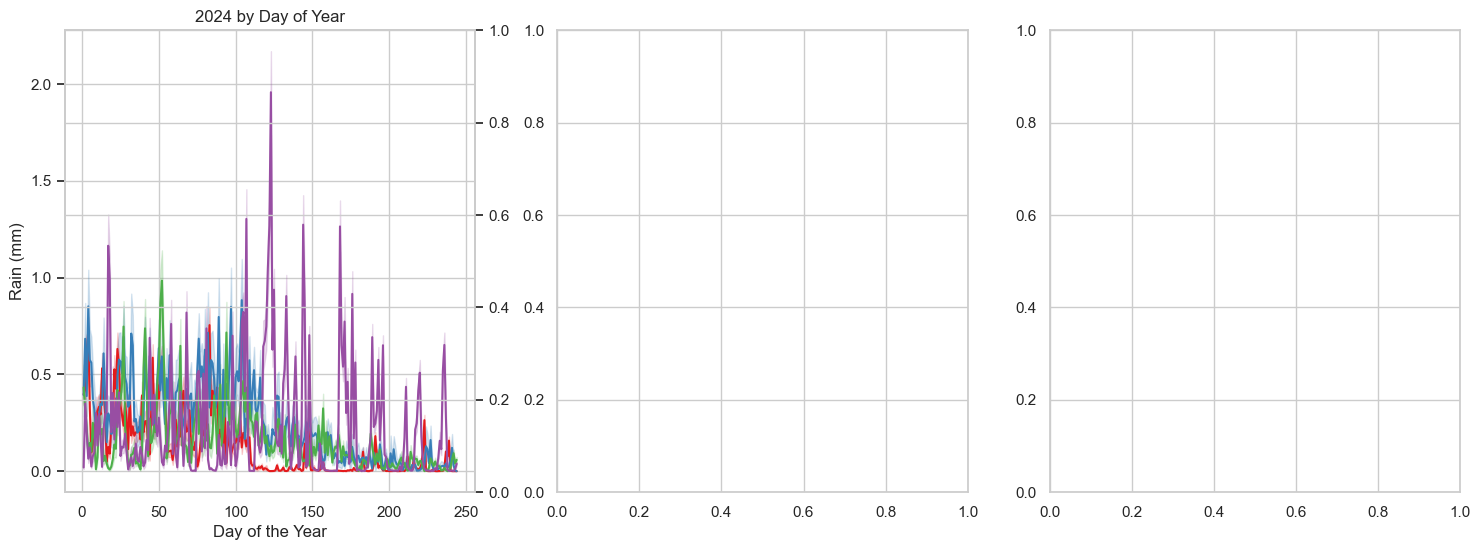

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_line_subplot(ax, merged_df, year):
    # Plot Rain on the primary y-axis
    sns.lineplot(
        ax=ax,
        x='day_of_year_x', 
        y='Rain', 
        hue='PowerPriceAreaCode', 
        data=merged_df,
        palette='Set1',  # Use distinct colors for regions
        legend=False      # Disable legend on the individual plots
    )
    ax.set_title(f'{year} by Day of Year')
    ax.set_xlabel('Day of the Year')
    ax.set_ylabel('Rain (mm)')
    
    # Create a second y-axis for the Price
    ax2 = ax.twinx()
    sns.lineplot(
        ax=ax2,
        x='day_of_year_x', 
        y='Price',  # Assuming 'Price' column exists in the dataframe
        hue='PowerPriceAreaCode', 
        data=merged_df,
        palette='Set1',  # Same color palette to keep consistency
        linestyle='--',  # Dashed lines for Price to differentiate
        legend=False      # Disable legend on individual plots
    )
    ax2.set_ylabel('Price (Currency)')  # Customize based on your price unit
    
    return ax

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot line charts for each year
plot_line_subplot(axs[0], df_2024, 2024)
plot_line_subplot(axs[1], df_2023, 2023)
plot_line_subplot(axs[2], df_2022, 2022)

# Adjust layout for better spacing
plt.tight_layout()

# Add a common legend for both Rain and Price, combining from all axes
handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels from the first plot
fig.legend(handles, labels, loc='upper right', title='PowerPriceAreaCode')

# Show the figure
plt.show()
